# Introduction to pandas
Copyright © Wendy Lee 2022

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width=700>

- pandas is a Python module designed to handle tabular data.
- Tabular data - data that has a shape like a table, with rows and columns.
- By convention, we use the short alias `pd` for pandas

In [ ]:
import pandas as pd

## Create data##
There are two core objects in pandas: the [**DataFrame**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) and [**Series**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). In this exercise, we will create some sample data and also read from an existing file.

### DataFrame ###
By convention, we use a generic name `df` for DataFrame objects

In [ ]:
list1 = ['a','b','c','d']
list2 = [1,3,4,6]
list3 = [10, 20, 30, 40]
pd.DataFrame({"Names": list1, "Scores": list2, "Prices": list3})

,Names,Scores,Prices
0,a,1,10
1,b,3,20
2,c,4,30
3,d,6,40


We are using the pd.DataFrame() constructor to generate these DataFrame objects. The syntax for declaring a new one is a dictionary whose **keys** are the **column names** (Names and Scores in this example), and whose **values** are a **list of entries**. This is the standard way of constructing a new DataFrame, and the one you are most likely to encounter.

The dictionary-list constructor assigns values to the column labels, but just uses an ascending count from 0 (0, 1, 2, 3, ...) for the **row labels**. Sometimes this is OK, but often times we will want to assign these labels ourselves.

The list of row labels used in a DataFrame is known as an **Index**. We can assign values to it by using an index parameter in our constructor:

In [ ]:
productList = ['Product A', 'Product B', 'Product C', 'Product D']
pd.DataFrame({"Names": list1, "Scores": list2}, index=productList)

,Names,Scores
Product A,a,1
Product B,b,3
Product C,c,4
Product D,d,6


### Series ###
- A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list. And in fact you can create one with nothing more than a list.

- It is different than a list: 1) it has an explicit index. 2) it has a type dtype, short for data type). The dtype can be integer, float, and object. int64 -  in Python which stands for 64 bit integer. The 64 refers to the memory allocated to store data in each cell which effectively relates to how many digits it can store in each “cell”

In [ ]:
myList = [1,2,3,3,4,5,8]
pd.Series(myList)

0    1
1    2
2    3
3    3
4    4
5    5
6    8
dtype: int64

**We can also create a pandas series with a list of strings**

In [ ]:
sList = ['ABC','DEF','GHI']
pd.Series(sList, index=productList[0:3], name='test')

Product A    ABC
Product B    DEF
Product C    GHI
Name: test, dtype: object

- Noticed that the dtype is `object`, not `str` as expected. It's because panadas uses object by default for strings. You can explicitly set the dtype to string by using the dtype argument.

In [ ]:
pd.Series(sList, dtype="string")

0    ABC
1    DEF
2    GHI
dtype: string

A Series is, in essence, a single column of a DataFrame. So you can assign column values to the Series the same way as before, using an index parameter. However, a Series does not have a column name, it only has one overall name:

In [ ]:
revenue = [30, 38, 58]
years = ['2018 Sales', '2019 Sales', '2020 Sales']
prod_a = pd.Series(revenue, index=years, name="Product A")
prod_a

2018 Sales    30
2019 Sales    38
2020 Sales    58
Name: Product A, dtype: int64

In [ ]:
rev_2 = [320, 100, 200]
prod_b = pd.Series(rev_2, index=years, name='Product B')
prod_b

2018 Sales    320
2019 Sales    100
2020 Sales    200
Name: Product B, dtype: int64

The Series and the DataFrame are intimately related. It's helpful to think of a DataFrame as actually being just a bunch of Series "glued together".

In [ ]:
df = pd.concat([prod_a, prod_b], axis=1)
df

df.loc['2018 Sales']
df.iloc[0]

Product A     30
Product B    320
Name: 2018 Sales, dtype: int64

### Reading data files ###
Being able to create a DataFrame or Series by hand is handy. But, most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.

We'll use the `pd.read_csv()` function to read the data into a DataFrame.

In [ ]:
csvFile = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/top_movies_2020.csv'
movies = pd.read_csv(csvFile)
movies

,Title,Gross,Gross (Adjusted),Year
0,Gone with the Wind,200852579,1895421694,1939
1,Star Wars: Episode IV - A New Hope,460998507,1668979715,1977
2,The Sound of Music,159287539,1335086324,1965
3,E.T. the Extra-Terrestrial,435110554,1329174791,1982
4,Titanic,659363944,1270101626,1997
...,...,...,...,...
195,Patton,61749765,373287682,1970
196,Fatal Attraction,156645693,371808159,1987
197,Iron Man 2,312433331,371691971,2010
198,Zootopia,341268248,371109157,2016


We can use the `shape` attribute to check how large the resulting DataFrame is:

In [ ]:
movies.shape

(200, 4)

We can examine the contents of the resultant DataFrame using the `head()` command, which grabs the first five rows:

In [ ]:
movies.head()

,Title,Gross,Gross (Adjusted),Year
0,Gone with the Wind,200852579,1895421694,1939
1,Star Wars: Episode IV - A New Hope,460998507,1668979715,1977
2,The Sound of Music,159287539,1335086324,1965
3,E.T. the Extra-Terrestrial,435110554,1329174791,1982
4,Titanic,659363944,1270101626,1997


We can use `tail()` to retrieve the last 5 rows of the DataFrame.

In [ ]:
movies.tail(2)

,Title,Gross,Gross (Adjusted),Year
198,Zootopia,341268248,371109157,2016
199,Liar Liar,181410615,370330510,1997


We can use the `dtypes` attribute to find out the data type of each column of the table.

In [ ]:
movies.dtypes

Title               object
Gross                int64
Gross (Adjusted)     int64
Year                 int64
dtype: object

We can even get more information about the columns by calling the `info` method:

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             200 non-null    object
 1   Gross             200 non-null    int64 
 2   Gross (Adjusted)  200 non-null    int64 
 3   Year              200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


This will tell us a bunch more information. From top to bottom we can see:
- what class the object is (a DataFrame)
- what the index looks like (a range from Gone with the Wind to Liar Liar)
- how many data columns we have
- for each column, how many values and their dtype
- a summary of how many columns have each dtype
- how much memory the object is taking up (more on that in a future chapter)

We can customize the column header names by assigning values to the columns attribute.

,Movie,Gross,Gross_adj,Year
0,Gone with the Wind,200852579,1895421694,1939
1,Star Wars: Episode IV - A New Hope,460998507,1668979715,1977
2,The Sound of Music,159287539,1335086324,1965
3,E.T. the Extra-Terrestrial,435110554,1329174791,1982
4,Titanic,659363944,1270101626,1997
...,...,...,...,...
195,Patton,61749765,373287682,1970
196,Fatal Attraction,156645693,371808159,1987
197,Iron Man 2,312433331,371691971,2010
198,Zootopia,341268248,371109157,2016


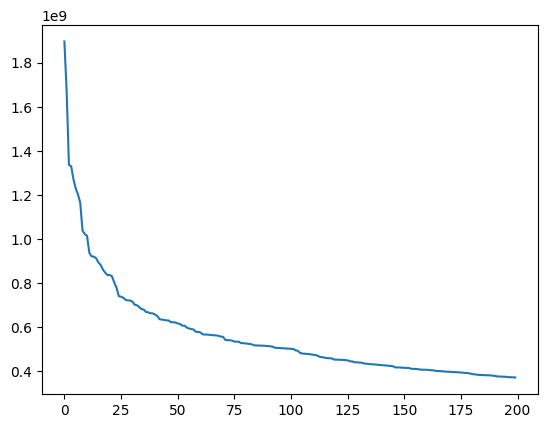

In [ ]:
movies.columns = ['Movie','Gross', 'Gross adj', 'Year']
movies['Gross adj'].plot()
movies.rename(columns={'Gross adj' : 'Gross_adj'})

To get even more information about the contents of the different columns, we can try the `describe` method:

In [ ]:
new_movies = movies.drop(columns=['Year']) # this will return a new dataframe and keep your original dataframe intact

new_movies.describe()

,Gross,Gross adj
count,200.00,200.00
mean,"256,492,048.62","560,869,366.30"
std,"170,567,531.47","227,797,683.45"
min,"9,183,673.00","370,330,510.00"
25%,"116,926,360.25","414,518,727.25"
50%,"234,196,310.00","500,451,231.50"
75%,"363,303,312.50","616,672,963.50"
max,"936,662,225.00","1,895,421,694.00"


It's hard to read the numbers in scientific notation. We can change the number format.

In [ ]:
# change the display format for float
# use commas to separate thousands and use 2 decimal points
# Learn more about python string format: https://www.guru99.com/python-string-format.html
pd.options.display.float_format = "{:,.1f}".format

movies.drop(columns=['Year']).describe()


,Gross,Gross adj
count,200.0,200.0
mean,"256,492,048.6","560,869,366.3"
std,"170,567,531.5","227,797,683.4"
min,"9,183,673.0","370,330,510.0"
25%,"116,926,360.2","414,518,727.2"
50%,"234,196,310.0","500,451,231.5"
75%,"363,303,312.5","616,672,963.5"
max,"936,662,225.0","1,895,421,694.0"


You can also get run `describe()` on a specific column (which is a Series rather than a DataFrame).

In [ ]:
movies['Gross adj'].describe()

count             200.00
mean      560,869,366.30
std       227,797,683.45
min       370,330,510.00
25%       414,518,727.25
50%       500,451,231.50
75%       616,672,963.50
max     1,895,421,694.00
Name: Gross adj, dtype: float64

The `pd.read_csv()` function has over [30 optional parameters](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) you can specify. For example, you can see in this dataset that the CSV file has a built-in index, which pandas did not pick up on automatically. To make pandas use that column for the index (instead of creating a new one from scratch), we can specify an `index_col`.

In [ ]:
#movies = pd.read_csv(csvFile)
movies = pd.read_csv(csvFile, index_col = 0)
movies.head()

,Gross,Gross (Adjusted),Year
Title,,,
Gone with the Wind,200852579,1895421694,1939
Star Wars: Episode IV - A New Hope,460998507,1668979715,1977
The Sound of Music,159287539,1335086324,1965
E.T. the Extra-Terrestrial,435110554,1329174791,1982
Titanic,659363944,1270101626,1997
